<a href="https://colab.research.google.com/github/tsabitanajma/Netflix-Content-Release-Patterns-and-Insights/blob/main/Netflix_Content_Release_Patterns_and_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NETFLIX CONTENT RELEASE PATTERNS AND IINSIGHT (2008-2021)

##About Dataset

This Netflix Dataset has information about the TV shows and movies available on Netflix untill 2021. This dataset is collected from Flixable which is a third-party Netflix search engine, and available on Kaggle website for free.

In [1]:
#Import library
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data
data = pd.read_csv('/content/Netflix Dataset.csv', sep=',')

In [3]:
#show top records of the dataset
data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [5]:
#Show the rows and columns
data.shape

(7789, 11)

The dataset consists of 7,789 rows and 11 columns.

In [6]:
# to show each column name
data.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

##Check and Handling Duplicate Rows

In [7]:
# Check row wise and detect the duplicate rows
data[data.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


**Row 6300:**
All values in columns such as Show_Id, Category, Title, Director, and others are duplicates of previous rows in the DataFrame (not displayed in this output).

**Row 6622:**
Similar to the previous row, this is a duplicate of another row in the DataFrame.

In [8]:
#Remove the duplicate rows permenantly
data_cln = data.drop_duplicates()

In [9]:
data_cln.shape

(7787, 11)

## Check Missing Values

In [10]:
data_cln.isna().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [11]:
#Percentage of missing value
director_mv = data_cln['Director'].isna().sum()/len(data_cln)*100
print('director_mv =', director_mv)
cast_mw = data_cln['Cast'].isna().sum()/len(data_cln)*100
print('cast_mv =', cast_mw)
country_mv = data_cln['Country'].isna().sum()/len(data_cln)*100
print('country_mv =', country_mv)
release_date_mv = data_cln['Release_Date'].isna().sum()/len(data_cln)*100
print('release_date_mv =', release_date_mv)
rating_mv = data_cln['Rating'].isna().sum()/len(data_cln)*100
print('rating_mv =', rating_mv)

director_mv = 30.666495441119817
cast_mv = 9.220495697958135
country_mv = 6.51085141903172
release_date_mv = 0.1284191601386927
rating_mv = 0.08989341209708489


There are missing values in the following columns:

1. Director = 2,388 missing values (30.67%)

2. Cast = 718 missing values (9.22%)

3. Country = 507 missing values (6.51%)

4. Release Date = 10 missing values (0.13%)

5. Rating = 7 missing values (0.09%)

## Released Content

###Yearly Released Content

In [16]:
# Transform 'Release_Date' to datetime type
data_cln['Release_Date'] = pd.to_datetime(data_cln['Release_Date'], format='mixed', errors='coerce')

# Add month and year columns
data_cln['Month'] = data_cln['Release_Date'].dt.month_name()
data_cln['Year'] = data_cln['Release_Date'].dt.year

<ipython-input-16-9097a5e3a6e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cln['Release_Date'] = pd.to_datetime(data_cln['Release_Date'], format='mixed', errors='coerce')
<ipython-input-16-9097a5e3a6e3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cln['Month'] = data_cln['Release_Date'].dt.month_name()
<ipython-input-16-9097a5e3a6e3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [18]:
#Yearly counts
yearly_counts = data_cln['Year'].value_counts().sort_index()
print(yearly_counts)

Year
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      25
2015.0      88
2016.0     443
2017.0    1225
2018.0    1685
2019.0    2153
2020.0    2009
2021.0     117
Name: count, dtype: int64


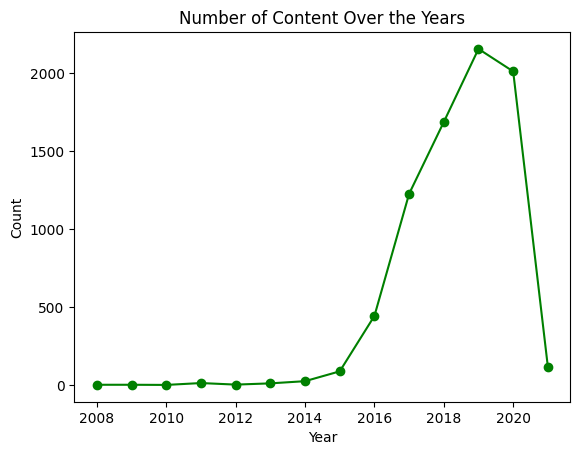

In [19]:
yearly_counts.sort_index().plot(kind='line', marker='o', color='green')
plt.title("Number of Content Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

###Monthly Released Content

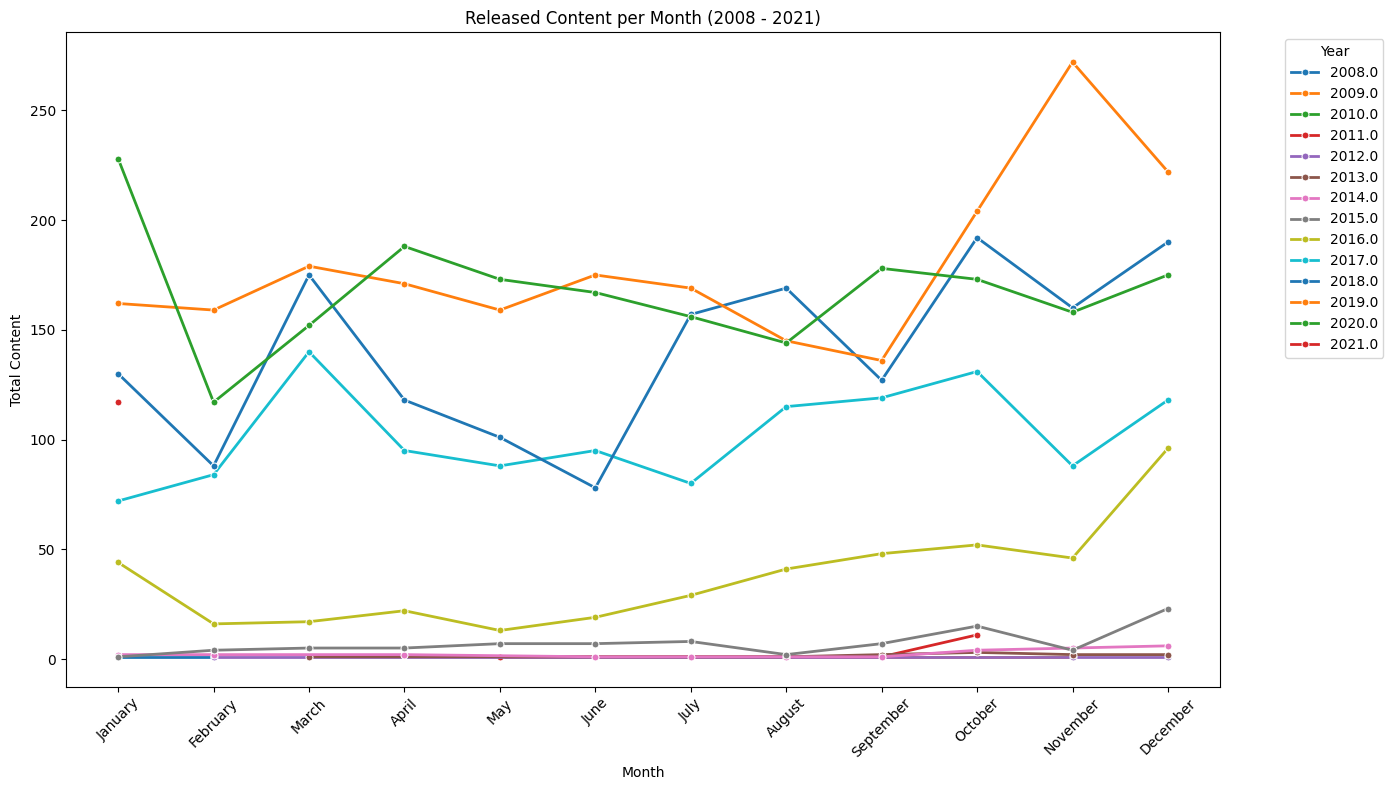

In [20]:
#Monthly counts

# Grouping data by month
monthly_counts = data_cln.groupby(['Year', 'Month']).size().reset_index(name='Counts')

# Order month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts['Month'] = pd.Categorical(monthly_counts['Month'], categories=month_order, ordered=True)
monthly_counts = monthly_counts.sort_values(['Year', 'Month'])

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_counts, x='Month', y='Counts', hue='Year', marker='o', palette='tab10', linestyle='-', linewidth=2, markersize=5)
plt.title('Released Content per Month (2008 - 2021)')
plt.xlabel('Month')
plt.ylabel('Total Content')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-21-4947f29f2312>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_total = monthly_counts.groupby('Month')['Counts'].sum().reindex(month_order)


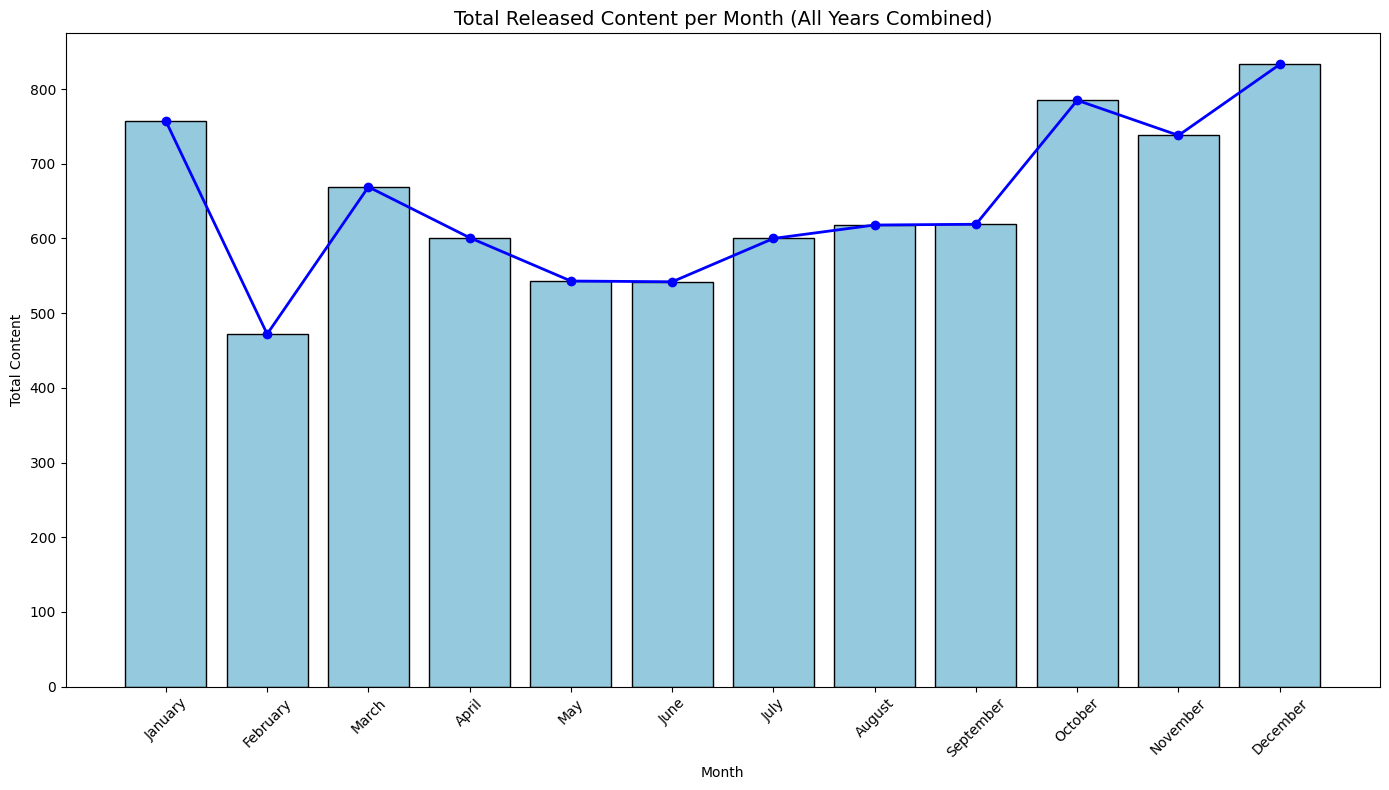

In [21]:
monthly_total = monthly_counts.groupby('Month')['Counts'].sum().reindex(month_order)

# Plot barchart with line on top
plt.figure(figsize=(14, 8))
mt_bars = sns.barplot(x=monthly_total.index, y=monthly_total.values, color='skyblue', edgecolor='black')

# Line plot above the bar
plt.plot(monthly_total.index, monthly_total.values, color='blue', marker='o', linewidth=2)

# Add labels and title
plt.title('Total Released Content per Month (All Years Combined)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Content')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 10 Released Content Country

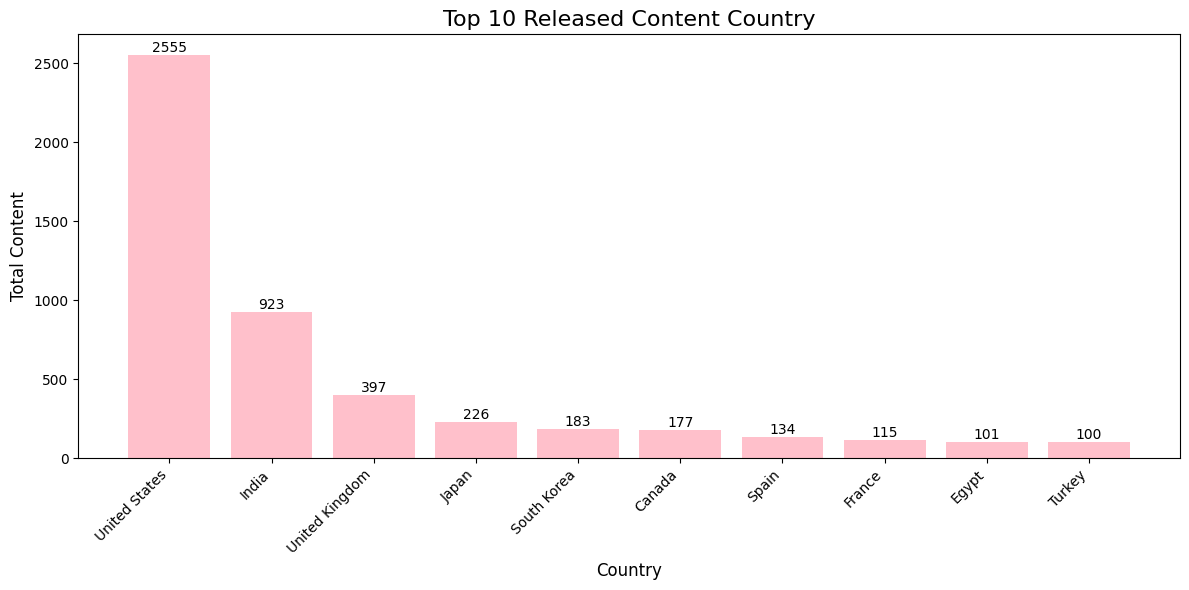

In [22]:
top_10_countries = data_cln['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_countries.index, top_10_countries.values, color='pink')
plt.title('Top 10 Released Content Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Content', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             int(height),
             ha='center', va='bottom')

plt.show()

##Content Category

###Most Released Category Over The Year

([0, 1], [Text(0, 0, 'Movie'), Text(1, 0, 'TV Show')])

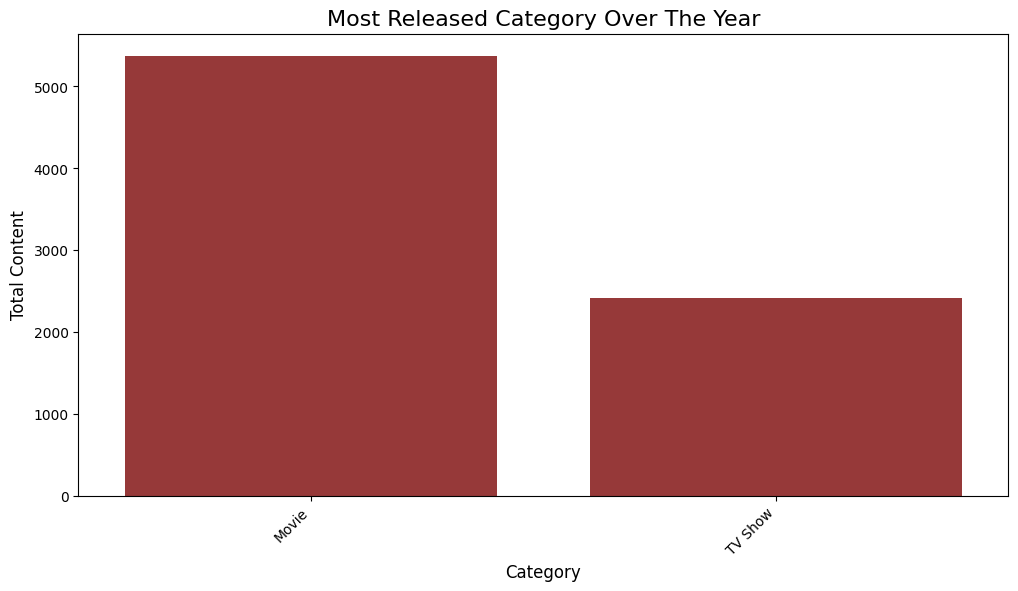

In [23]:
category_counts = data_cln['Category'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, color='brown')
plt.title('Most Released Category Over The Year', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Content', fontsize=12)
plt.xticks(rotation=45, ha='right')

### Category Counts per Year

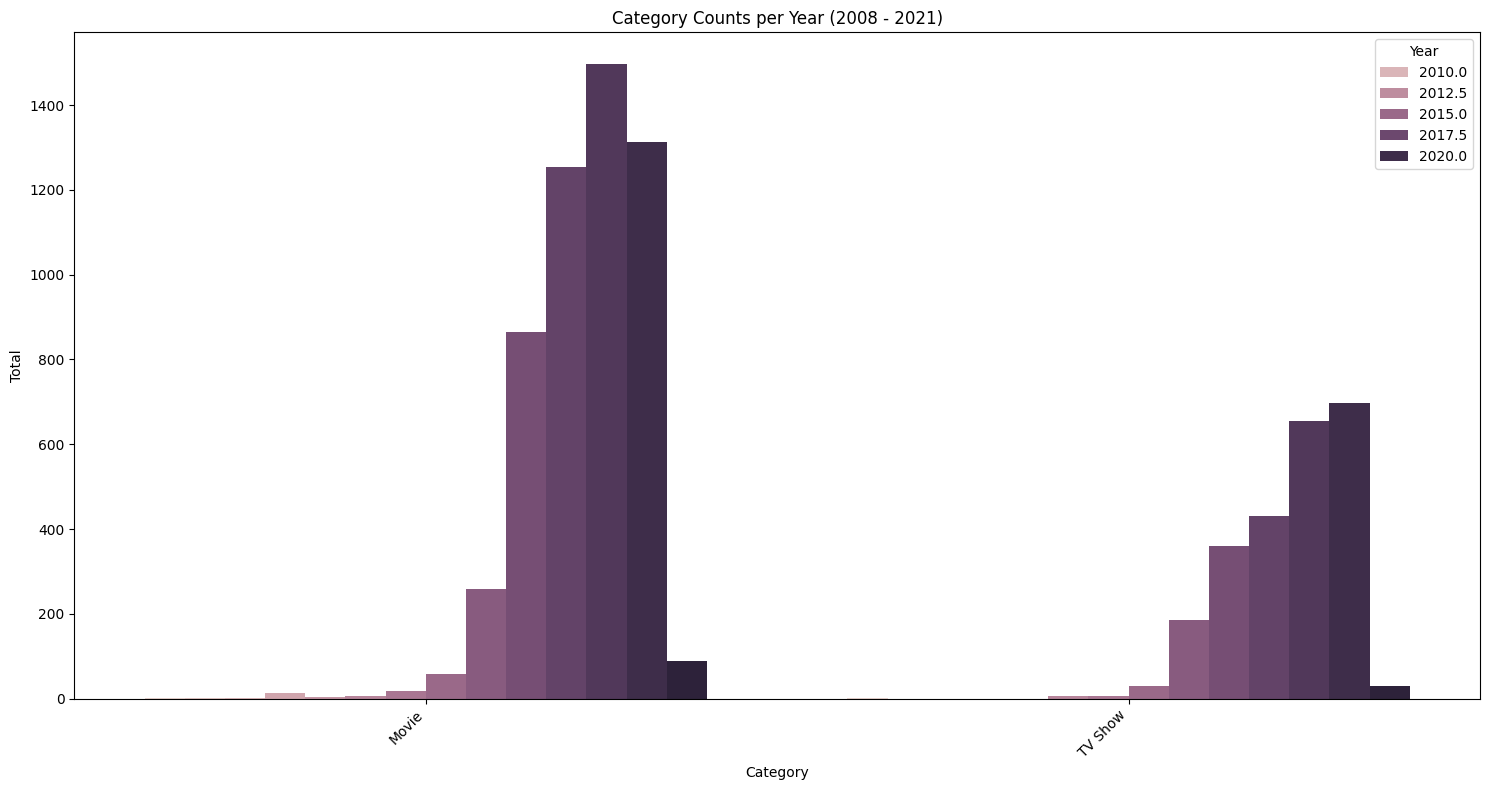

In [24]:
# Grouping by category
category_counts_by_year = data_cln.groupby(['Year', 'Category'])['Category'].count().reset_index(name='Count')

# Bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x='Category', y='Count', hue='Year', data=category_counts_by_year)
plt.title('Category Counts per Year (2008 - 2021)')
plt.xlabel('Category')
plt.ylabel('Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Year', loc='upper right')
plt.show()

Movie is the most released content by category and the most Movie content was released in 2019.

###Category Counts per Month

In [25]:
# Grouping by category per month
category_counts_by_month = data_cln.groupby(['Month', 'Category'])['Category'].count().reset_index(name='Count')
category_counts_by_month['Month'] = pd.Categorical(category_counts_by_month['Month'], categories=month_order, ordered=True)

#Split category
movie_data = category_counts_by_month[category_counts_by_month['Category'] == 'Movie'].sort_values('Month')
tv_data = category_counts_by_month[category_counts_by_month['Category'] == 'TV Show'].sort_values('Month')

print("Movie Data:")
print(movie_data)

print("\nTV Show Data:")
print(tv_data)

Movie Data:
        Month Category  Count
8     January    Movie    560
6    February    Movie    328
14      March    Movie    471
0       April    Movie    420
16        May    Movie    371
12       June    Movie    377
10       July    Movie    403
2      August    Movie    414
22  September    Movie    415
20    October    Movie    553
18   November    Movie    511
4    December    Movie    554

TV Show Data:
        Month Category  Count
9     January  TV Show    197
7    February  TV Show    144
15      March  TV Show    198
1       April  TV Show    181
17        May  TV Show    172
13       June  TV Show    165
11       July  TV Show    197
3      August  TV Show    204
23  September  TV Show    204
21    October  TV Show    232
19   November  TV Show    227
5    December  TV Show    279


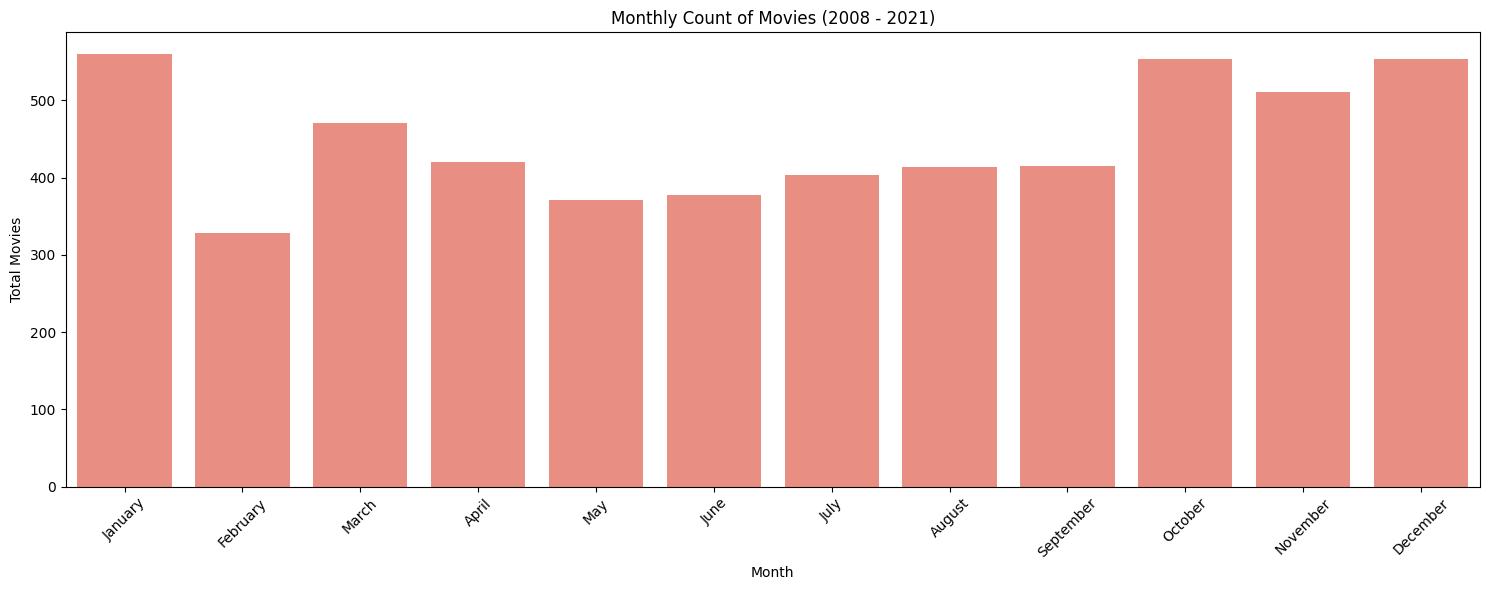

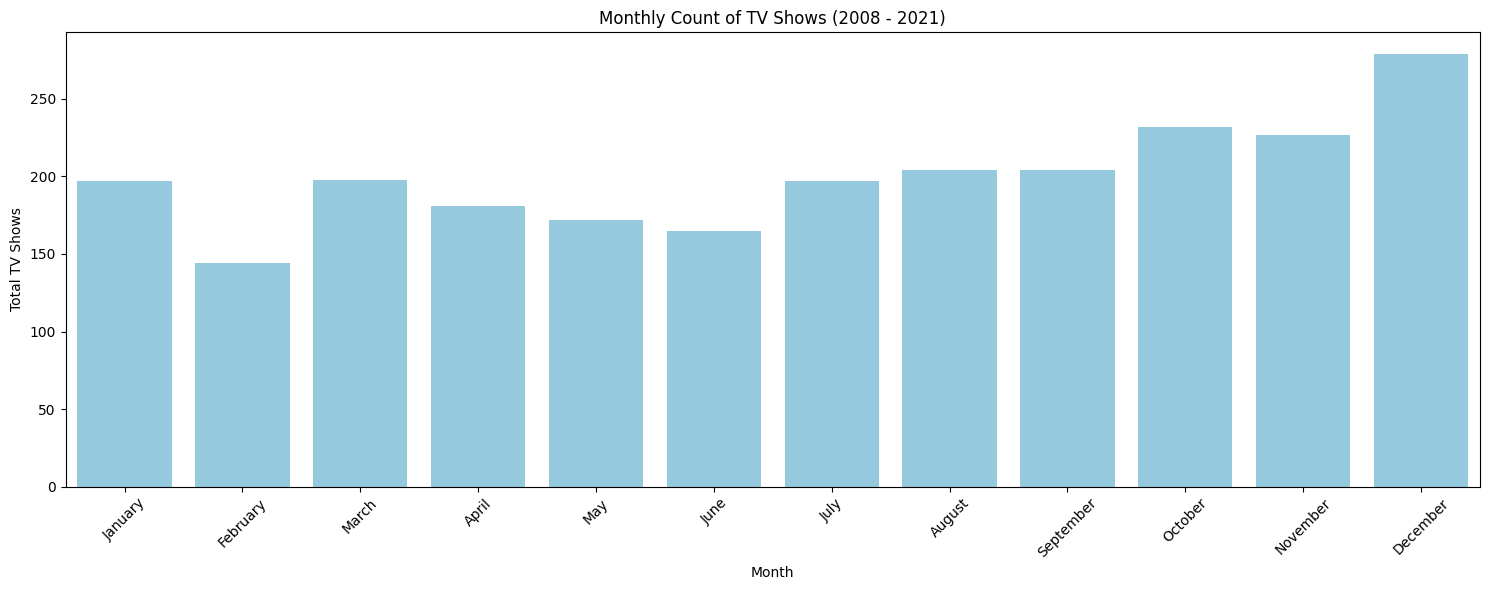

In [26]:
# Bar chart for movie
plt.figure(figsize=(15, 6))
sns.barplot(x='Month', y='Count', data=movie_data, color='salmon')
plt.title('Monthly Count of Movies (2008 - 2021)')
plt.xlabel('Month')
plt.ylabel('Total Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Bar chart for tv shows
plt.figure(figsize=(15, 6))
sns.barplot(x='Month', y='Count', data=tv_data,  color='skyblue')
plt.title('Monthly Count of TV Shows (2008 - 2021)')
plt.xlabel('Month')
plt.ylabel('Total TV Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Content Genre

###Genre per Year

In [41]:
#split 'Type'
genre_exploded = data_cln.dropna(subset=['Type']).assign(Type=data_cln['Type'].str.split(',')).explode('Type')
genre_exploded = genre_exploded.explode('Type')

# Group by year and Type, then count occurrences
genre_counts_by_year = data_cln.groupby(['Year', 'Type'])['Type'].count().reset_index(name='Count')

genre_by_year = genre_exploded.groupby(['Year', 'Type']).size().reset_index(name='Count')
genre_by_year.head(20)

,Year,Type,Count
0,2008.0,Independent Movies,1
1,2008.0,Thrillers,1
2,2008.0,Dramas,1
3,2008.0,Stand-Up Comedy & Talk Shows,1
4,2009.0,International Movies,1
5,2009.0,Dramas,1
6,2009.0,Horror Movies,1
7,2010.0,Horror Movies,1
8,2010.0,Cult Movies,1
9,2011.0,Dramas,1


###Top Genre each Year

In [52]:
top_genre_each_year = genre_by_year.sort_values('Count', ascending=False).drop_duplicates('Year')
top_genre_each_year = top_genre_each_year.sort_values('Year')
print(top_genre_each_year)

       Year                   Type  Count
0    2008.0     Independent Movies      1
4    2009.0   International Movies      1
8    2010.0            Cult Movies      1
15   2011.0                 Dramas     12
19   2012.0          Documentaries      1
34   2013.0        Stand-Up Comedy      4
48   2014.0          Documentaries      8
83   2015.0          Documentaries     13
105  2016.0   International Movies     83
168  2017.0   International Movies    398
234  2018.0   International Movies    651
303  2019.0   International Movies    613
371  2020.0   International Movies    541
434  2021.0   International Movies     23


###Top Genre each Month

In [46]:
# Order month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

top_genre_each_month['Month'] = pd.Categorical(
    top_genre_each_month['Month'],
    categories=month_order,
    ordered=True
)


top_genre_each_month = top_genre_each_month.sort_values('Month')
print(top_genre_each_month)


         Month                   Type  Count
266    January   International Movies    178
203   February   International Movies    144
461      March   International Movies    221
10       April   International Movies    188
523        May   International Movies    181
394       June   International Movies    186
330       July   International Movies    172
72      August   International Movies    180
716  September   International Movies    196
652    October   International Movies    254
586   November   International Movies    183
136   December   International Movies    240


###Genre each Category

In [55]:
genre_by_category = genre_exploded.groupby(['Category', 'Type'])['Type'].count().unstack()

top_genre_each_category = genre_by_category.drop_duplicates('Category')
top_genre_each_category = top_genre_each_category.sort_values('Category')

# Reset the index to make 'Category' a column again
genre_by_category = genre_by_category.reset_index()

# Now you can use drop_duplicates on the 'Category' column
genre_each_category = genre_by_category.drop_duplicates('Category')

# Sort by 'Category' if needed
genre_each_category = genre_each_category.sort_values('Category')

genre_each_category

Type,index,Category,Anime Features,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,...,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Sci-Fi & Fantasy,TV Shows,Thrillers
0,0,Movie,38.0,30.0,NaN,26.0,397.0,NaN,47.0,35.0,...,1.0,321.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0
1,1,TV Show,NaN,NaN,6.0,NaN,NaN,58.0,NaN,NaN,...,NaN,NaN,33.0,37.0,110.0,62.0,10.0,1.0,12.0,NaN


###Top 10 US Genre

In [76]:
us_content = genre_exploded[genre_exploded['Country'] == 'United States'].groupby(['Type'])['Type'].count().reset_index(name='count')
# us_content is now a DataFrame with 'Type' and 'count' columns.
# You can further analyze it or pivot it using other methods if needed.
genre_counts_us = us_content.sort_values('count', ascending=False).head(10)  # Sort and get top 10
genre_counts_us

,Type,count
45,Documentaries,358
47,Dramas,333
42,Comedies,297
10,Independent Movies,274
39,Children & Family Movies,239
59,Stand-Up Comedy,206
35,Action & Adventure,196
7,Dramas,184
2,Comedies,161
18,Romantic Movies,145


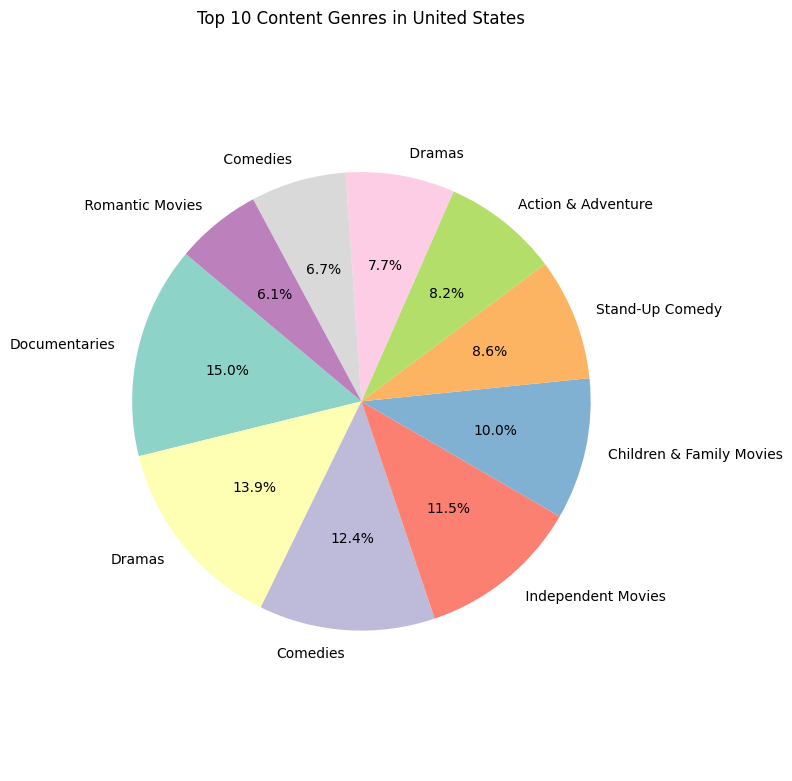

In [78]:
import matplotlib.pyplot as plt

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts_us['count'],
        labels=genre_counts_us['Type'],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Set3.colors)  # Optional: Set a colorful palette

plt.title('Top 10 Content Genres in United States')
plt.axis('equal')  # Equal aspect ratio to ensure pie is a circle
plt.tight_layout()
plt.show()

##Content Rating

###Movie Rating

In [91]:
#Count
movie_rating_counts = data_cln[data_cln['Category'] == 'Movie']['Rating'].value_counts()

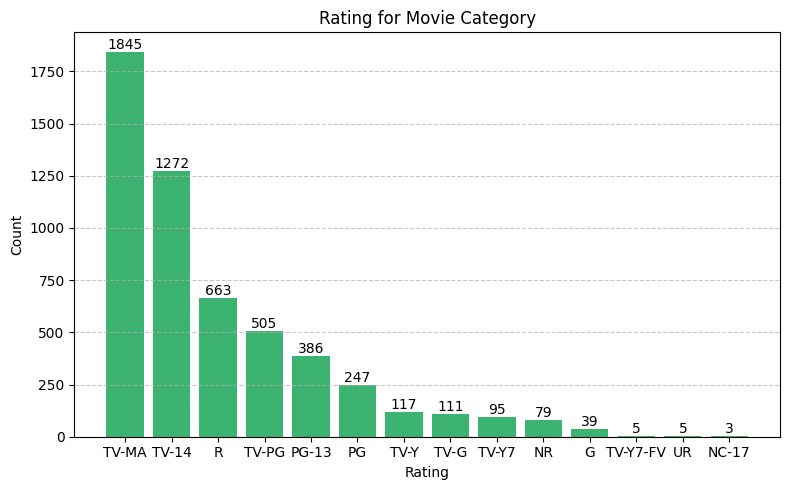

In [89]:
# Bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(movie_rating_counts.index, movie_rating_counts.values,
               width=0.8, color='mediumseagreen')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, str(height),
             ha='center', va='bottom', fontsize=10)

plt.title('Rating for Movie Category')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###TV Shows Rating

In [92]:
#Count
tvs_rating_counts = data_cln[data_cln['Category'] == 'TV Show']['Rating'].value_counts()

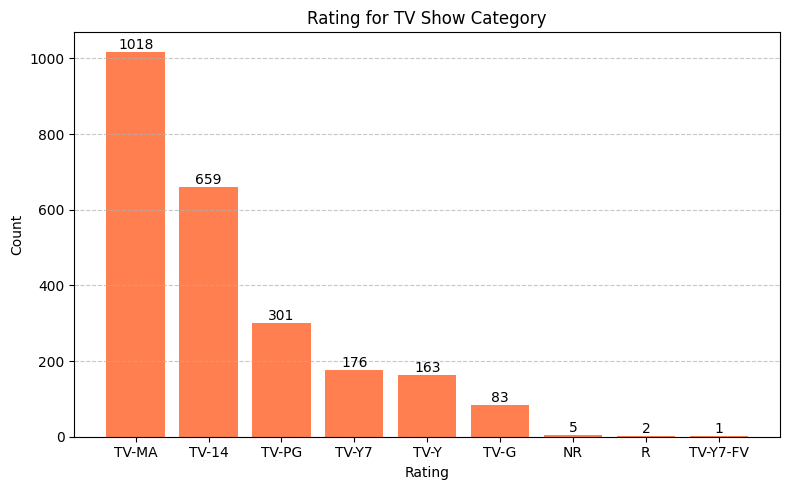

In [95]:
# Bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(tvs_rating_counts.index, tvs_rating_counts.values,
               width=0.8, color='coral')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, str(height),
             ha='center', va='bottom', fontsize=10)

plt.title('Rating for TV Show Category')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##Description

###Most Showed Word in Horror Content

In [98]:
# Filter by 'Horror Movies'
horror_data = data_cln[data_cln['Type'].str.contains('Horror Movies', na=False)]
# Gabungkan semua teks di kolom "Description"
horror_text = " ".join(description for description in horror_data["Description"].dropna())
print(f"Words count: {len(horror_text.split())}")

Words count: 7572


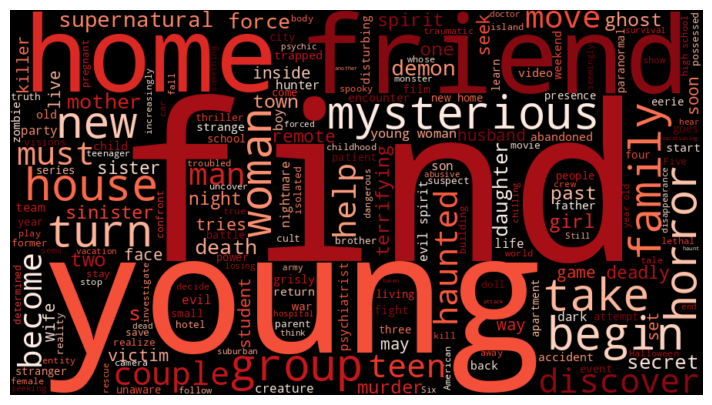

In [97]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

#Drop noise word
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=900, height=500, background_color='black', colormap='Reds', stopwords=stopwords).generate(horror_text)

# Show Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##Conclusion

1. **Released Content**  
   - The highest number of content was released on Netflix in 2019, and from 2012 to 2019, the number continued to increase, although there was a decline in 2020 and 2021.  
   - The most content on Netflix was released in December from 2008 to 2021.  
   - The United States released the highest number of content between 2008 and 2021, with 2,555 items.

2. **Content Category**  
   - Movies were the most frequently released content on Netflix from 2008 to 2021.  
   - Movies were the category released the most each year, with the highest number of releases occurring in 2019.  
   - Between 2008 and 2021, January had the most movie releases, and December had the most TV show releases.

3. **Content Genre**  
   - International movies were the most commonly released genre from 2008 to 2021.  
   - The most frequently released genre by the US from 2008 to 2021 was documentaries.

4. **Content Rating**  
   - The most common rating for movies was TV-MA.  
   - The most common rating for TV shows was also TV-MA.

5. **Description**  
   - The most frequently used words in the descriptions of horror content were "find," "young," and "home."